In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df=pd.read_csv("laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.shape

(1303, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


# Data
### no null values
### textual data

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df['Ram'].value_counts() # No Problem except GB

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [7]:
df['Ram']=df['Ram'].str.split('GB').str[0]

In [8]:
df['Weight']=df['Weight'].str.split('kg').str[0]

In [9]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [10]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [11]:
df['y_res']=df['ScreenResolution'].str.split('x').str[-1]

In [12]:
df['x_res']=df['ScreenResolution'].str.split('x').str[0].str.split().str[-1]

In [13]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,y_res,x_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1600,2560
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,900,1440
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1080,1920
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1800,2880
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1600,2560


In [14]:
df['touchscreen']=df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

In [15]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [16]:
df['Full_HD']=df['ScreenResolution'].apply(lambda x : 1 if 'Full HD' in x else 0)

In [17]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,y_res,x_res,touchscreen,Full_HD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1600,2560,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,900,1440,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1080,1920,0,1
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1800,2880,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1600,2560,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400,1080,1920,1,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200,1800,3200,1,0
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200,768,1366,0,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,768,1366,0,0


In [18]:
df['ScreenResolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [19]:
df['IPS_Panel']=df['ScreenResolution'].apply(lambda x : 1 if 'IPS Panel' in x else 0)

In [20]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,y_res,x_res,touchscreen,Full_HD,IPS_Panel
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1600,2560,0,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,900,1440,0,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1080,1920,0,1,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1800,2880,0,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1600,2560,0,0,1


In [21]:
df.drop('ScreenResolution',axis=1,inplace=True)

In [22]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,y_res,x_res,touchscreen,Full_HD,IPS_Panel
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1600,2560,0,0,1
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,900,1440,0,0,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1080,1920,0,1,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1800,2880,0,0,1
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1600,2560,0,0,1


In [23]:
df.corr()

,Inches,Price,touchscreen,Full_HD,IPS_Panel
Inches,1.000000,0.068197,-0.361735,0.163551,-0.114804
Price,0.068197,1.000000,0.191226,0.198612,0.252208
touchscreen,-0.361735,0.191226,1.000000,-0.105188,0.150512
Full_HD,0.163551,0.198612,-0.105188,1.000000,0.185442
IPS_Panel,-0.114804,0.252208,0.150512,0.185442,1.000000


In [24]:
df.corr()['Price']

Inches         0.068197
Price          1.000000
touchscreen    0.191226
Full_HD        0.198612
IPS_Panel      0.252208
Name: Price, dtype: float64

## CPU

In [25]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [26]:
df['Cpu'].str.split()

0                         [Intel, Core, i5, 2.3GHz]
1                         [Intel, Core, i5, 1.8GHz]
2                  [Intel, Core, i5, 7200U, 2.5GHz]
3                         [Intel, Core, i7, 2.7GHz]
4                         [Intel, Core, i5, 3.1GHz]
                           ...                     
1298               [Intel, Core, i7, 6500U, 2.5GHz]
1299               [Intel, Core, i7, 6500U, 2.5GHz]
1300    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
1301               [Intel, Core, i7, 6500U, 2.5GHz]
1302    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
Name: Cpu, Length: 1303, dtype: object

In [27]:
# So if we observe we need to extract the first 3 words to get CPU name
df['Cpu_name']=df['Cpu'].apply(lambda x:" ".join(x.split()[:3]))

In [28]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,y_res,x_res,touchscreen,Full_HD,IPS_Panel,Cpu_name
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1600,2560,0,0,1,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,900,1440,0,0,0,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1080,1920,0,1,0,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1800,2880,0,0,1,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1600,2560,0,0,1,Intel Core i5


In [29]:
df['Cpu_name'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [30]:
#clearly mostly we have 2 types AMD and INTEL
def correction(text):
    if text=='Intel Core i3' or text=='Intel Core i5' or text=='Intel Core i7' :
        return text
    else:
        if text.split()[0]=='Intel' :  #belong to intel family
            return 'Other Intel Processor'
        elif(text.split()[0]=='AMD'):
            return 'AMD Processor'
        else:
            return 'Other'

In [31]:
df['Cpu_name']=df['Cpu_name'].apply(lambda text:correction(text) )

In [32]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,y_res,x_res,touchscreen,Full_HD,IPS_Panel,Cpu_name
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1600,2560,0,0,1,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,900,1440,0,0,0,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1080,1920,0,1,0,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1800,2880,0,0,1,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1600,2560,0,0,1,Intel Core i5


In [33]:
df['Cpu_name'].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             62
Other                      1
Name: Cpu_name, dtype: int64

In [34]:
#clearly no need of other 
def correction(text):
    if text=='Intel Core i3' or text=='Intel Core i5' or text=='Intel Core i7' :
        return text
    else:
        if text.split()[0]=='Intel' :  #belong to intel family
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [35]:
df['Cpu_name']=df['Cpu_name'].apply(lambda text:correction(text) )

In [36]:
df['Cpu_name'].value_counts()

Intel Core i7    527
Intel Core i5    423
AMD Processor    217
Intel Core i3    136
Name: Cpu_name, dtype: int64

In [37]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,y_res,x_res,touchscreen,Full_HD,IPS_Panel,Cpu_name
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1600,2560,0,0,1,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,900,1440,0,0,0,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1080,1920,0,1,0,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1800,2880,0,0,1,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1600,2560,0,0,1,Intel Core i5


In [38]:
df['Cpu_speed']=df['Cpu'].str.split('GHz').str[0].str.split().str[-1]

In [39]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,y_res,x_res,touchscreen,Full_HD,IPS_Panel,Cpu_name,Cpu_speed
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1600,2560,0,0,1,Intel Core i5,2.3
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,900,1440,0,0,0,Intel Core i5,1.8
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1080,1920,0,1,0,Intel Core i5,2.5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1800,2880,0,0,1,Intel Core i7,2.7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1600,2560,0,0,1,Intel Core i5,3.1


In [40]:
df.drop('Cpu',axis=1,inplace=True)

In [41]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,y_res,x_res,touchscreen,Full_HD,IPS_Panel,Cpu_name,Cpu_speed
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1600,2560,0,0,1,Intel Core i5,2.3
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,900,1440,0,0,0,Intel Core i5,1.8
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1080,1920,0,1,0,Intel Core i5,2.5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1800,2880,0,0,1,Intel Core i7,2.7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1600,2560,0,0,1,Intel Core i5,3.1


## Memory

In [42]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [43]:
df['Memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object

In [44]:
df['Memory']=df['Memory'].apply(lambda text:text.replace('TB','000') )
df['Memory']=df['Memory'].apply(lambda text:text.replace('GB','') )

In [45]:
df['Memory']

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: Memory, Length: 1303, dtype: object

In [46]:
df['Memory_size']=df['Memory'].str.split().str[0]

In [47]:
df.head(2)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,y_res,x_res,touchscreen,Full_HD,IPS_Panel,Cpu_name,Cpu_speed,Memory_size
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1600,2560,0,0,1,Intel Core i5,2.3,128
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,900,1440,0,0,0,Intel Core i5,1.8,128


In [48]:
df['Memory'].apply(lambda x:" ".join(x.split()[1:]))

0                 SSD
1       Flash Storage
2                 SSD
3                 SSD
4                 SSD
            ...      
1298              SSD
1299              SSD
1300    Flash Storage
1301              HDD
1302              HDD
Name: Memory, Length: 1303, dtype: object

In [49]:
df['Memory_type']=df['Memory'].apply(lambda x:" ".join(x.split()[1:]))

In [50]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,y_res,x_res,touchscreen,Full_HD,IPS_Panel,Cpu_name,Cpu_speed,Memory_size,Memory_type
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1600,2560,0,0,1,Intel Core i5,2.3,128,SSD
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,900,1440,0,0,0,Intel Core i5,1.8,128,Flash Storage
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1080,1920,0,1,0,Intel Core i5,2.5,256,SSD
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1800,2880,0,0,1,Intel Core i7,2.7,512,SSD
4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1600,2560,0,0,1,Intel Core i5,3.1,256,SSD


In [51]:
df['Memory_type'].value_counts()

SSD                         637
HDD                         374
SSD + 1000 HDD              183
Flash Storage                74
SSD + 2000 HDD               15
Hybrid                       10
SSD + 256 SSD                 3
SSD + 500 HDD                 2
SSD + 1.0000 Hybrid           2
SSD + 512 SSD                 1
Flash Storage + 1000 HDD      1
HDD + 1000 HDD                1
Name: Memory_type, dtype: int64

In [52]:
df['Memory_ext']=df['Memory_type'].str.split('+').str[1]

In [53]:
df['Memory_ext'].value_counts()

 1000 HDD         185
 2000 HDD          15
 256 SSD            3
 500 HDD            2
 1.0000 Hybrid      2
 512 SSD            1
Name: Memory_ext, dtype: int64

In [54]:
df['Memory_ext_size']=df['Memory_ext'].str.split().str[0]
df['Memory_ext_type']=df['Memory_ext'].str.split().str[1]

In [55]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,y_res,...,touchscreen,Full_HD,IPS_Panel,Cpu_name,Cpu_speed,Memory_size,Memory_type,Memory_ext,Memory_ext_size,Memory_ext_type
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1600,...,0,0,1,Intel Core i5,2.3,128,SSD,NaN,NaN,NaN
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,900,...,0,0,0,Intel Core i5,1.8,128,Flash Storage,NaN,NaN,NaN
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1080,...,0,1,0,Intel Core i5,2.5,256,SSD,NaN,NaN,NaN
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1800,...,0,0,1,Intel Core i7,2.7,512,SSD,NaN,NaN,NaN
4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1600,...,0,0,1,Intel Core i5,3.1,256,SSD,NaN,NaN,NaN


In [56]:
df.drop('Memory',axis=1,inplace=True)

In [57]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,y_res,x_res,touchscreen,Full_HD,IPS_Panel,Cpu_name,Cpu_speed,Memory_size,Memory_type,Memory_ext,Memory_ext_size,Memory_ext_type
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1600,2560,0,0,1,Intel Core i5,2.3,128,SSD,NaN,NaN,NaN
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,900,1440,0,0,0,Intel Core i5,1.8,128,Flash Storage,NaN,NaN,NaN
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,1080,1920,0,1,0,Intel Core i5,2.5,256,SSD,NaN,NaN,NaN
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,1800,2880,0,0,1,Intel Core i7,2.7,512,SSD,NaN,NaN,NaN
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1600,2560,0,0,1,Intel Core i5,3.1,256,SSD,NaN,NaN,NaN


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1303 non-null   object 
 1   TypeName         1303 non-null   object 
 2   Inches           1303 non-null   float64
 3   Ram              1303 non-null   object 
 4   Gpu              1303 non-null   object 
 5   OpSys            1303 non-null   object 
 6   Weight           1303 non-null   object 
 7   Price            1303 non-null   float64
 8   y_res            1303 non-null   object 
 9   x_res            1303 non-null   object 
 10  touchscreen      1303 non-null   int64  
 11  Full_HD          1303 non-null   int64  
 12  IPS_Panel        1303 non-null   int64  
 13  Cpu_name         1303 non-null   object 
 14  Cpu_speed        1303 non-null   object 
 15  Memory_size      1303 non-null   object 
 16  Memory_type      1303 non-null   object 
 17  Memory_ext    

In [59]:
df['Memory_size']=df['Memory_size'].apply(lambda text:text.replace('1.0000','1000') )

In [60]:
df['Ram']=df['Ram'].astype('int')
df['Weight']=df['Weight'].astype('float')

df['y_res']=df['y_res'].astype('int')
df['x_res']=df['x_res'].astype('int')

df['Cpu_speed']=df['Cpu_speed'].astype('float')

df['Memory_size']=df['Memory_size'].astype('int')

In [61]:
df['Memory_size'].value_counts()

256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: Memory_size, dtype: int64

In [62]:
df.head(2)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,y_res,x_res,touchscreen,Full_HD,IPS_Panel,Cpu_name,Cpu_speed,Memory_size,Memory_type,Memory_ext,Memory_ext_size,Memory_ext_type
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1600,2560,0,0,1,Intel Core i5,2.3,128,SSD,NaN,NaN,NaN
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,900,1440,0,0,0,Intel Core i5,1.8,128,Flash Storage,NaN,NaN,NaN


In [63]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
y_res          0.552809
x_res          0.556529
touchscreen    0.191226
Full_HD        0.198612
IPS_Panel      0.252208
Cpu_speed      0.430293
Memory_size   -0.122365
Name: Price, dtype: float64

## Gpu

In [64]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [65]:
a=df['Gpu'].value_counts()

In [66]:
a[a>8]

Intel HD Graphics 620         281
Intel HD Graphics 520         185
Intel UHD Graphics 620         68
Nvidia GeForce GTX 1050        66
Nvidia GeForce GTX 1060        48
Nvidia GeForce 940MX           43
AMD Radeon 530                 41
Intel HD Graphics 500          39
Intel HD Graphics 400          37
Nvidia GeForce GTX 1070        30
Intel HD Graphics              29
Nvidia GeForce GTX 1050 Ti     28
AMD Radeon R5 M430             22
Nvidia GeForce 930MX           20
AMD Radeon 520                 17
Nvidia GeForce MX150           15
Intel HD Graphics 515          15
Intel HD Graphics 615          14
AMD Radeon R7 M445             14
Nvidia GeForce GTX 960M        14
Nvidia GeForce 920MX           13
Intel HD Graphics 505          12
AMD Radeon R5                  11
Nvidia GeForce GTX 980M        10
Intel HD Graphics 405           9
Nvidia Quadro M1200             9
Name: Gpu, dtype: int64

In [67]:
df['Gpu'].str.split().str[-1]

0            640
1           6000
2            620
3            455
4            650
          ...   
1298         520
1299         520
1300    Graphics
1301        M330
1302    Graphics
Name: Gpu, Length: 1303, dtype: object

In [68]:
df['gpu_2']=df['Gpu'].str.split().str[1]

In [69]:
df['Gpu'].str.split().str[0].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu, dtype: int64

In [70]:
df.corr()

,Inches,Ram,Weight,Price,y_res,x_res,touchscreen,Full_HD,IPS_Panel,Cpu_speed,Memory_size
Inches,1.000000,0.237993,0.827631,0.068197,-0.095404,-0.071245,-0.361735,0.163551,-0.114804,0.307870,0.269511
Ram,0.237993,1.000000,0.383874,0.743007,0.424437,0.433121,0.116984,0.210359,0.206623,0.368000,0.018271
Weight,0.827631,0.383874,1.000000,0.210370,-0.053846,-0.032880,-0.294620,0.148003,0.016967,0.320434,0.179962
Price,0.068197,0.743007,0.210370,1.000000,0.552809,0.556529,0.191226,0.198612,0.252208,0.430293,-0.122365
y_res,-0.095404,0.424437,-0.053846,0.552809,1.000000,0.994219,0.357930,0.048659,0.289030,0.169668,-0.080979
x_res,-0.071245,0.433121,-0.032880,0.556529,0.994219,1.000000,0.351066,0.070875,0.281457,0.183548,-0.073893
touchscreen,-0.361735,0.116984,-0.294620,0.191226,0.357930,0.351066,1.000000,-0.105188,0.150512,-0.082579,-0.030950
Full_HD,0.163551,0.210359,0.148003,0.198612,0.048659,0.070875,-0.105188,1.000000,0.185442,0.288385,-0.131381
IPS_Panel,-0.114804,0.206623,0.016967,0.252208,0.289030,0.281457,0.150512,0.185442,1.000000,0.063035,-0.119251
Cpu_speed,0.307870,0.368000,0.320434,0.430293,0.169668,0.183548,-0.082579,0.288385,0.063035,1.000000,0.066295


In [71]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,y_res,x_res,...,Full_HD,IPS_Panel,Cpu_name,Cpu_speed,Memory_size,Memory_type,Memory_ext,Memory_ext_size,Memory_ext_type,gpu_2
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1600,2560,...,0,1,Intel Core i5,2.3,128,SSD,NaN,NaN,NaN,Iris
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,900,1440,...,0,0,Intel Core i5,1.8,128,Flash Storage,NaN,NaN,NaN,HD
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,1080,1920,...,1,0,Intel Core i5,2.5,256,SSD,NaN,NaN,NaN,HD
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,1800,2880,...,0,1,Intel Core i7,2.7,512,SSD,NaN,NaN,NaN,Radeon
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1600,2560,...,0,1,Intel Core i5,3.1,256,SSD,NaN,NaN,NaN,Iris


In [72]:
df['Gpu_brand']=df['Gpu'].apply(lambda x:x.split()[0])
df=df[df['Gpu_brand']!='ARM']

In [73]:
df.drop('Gpu',axis=1,inplace=True)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [74]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,y_res,x_res,touchscreen,...,IPS_Panel,Cpu_name,Cpu_speed,Memory_size,Memory_type,Memory_ext,Memory_ext_size,Memory_ext_type,gpu_2,Gpu_brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,1600,2560,0,...,1,Intel Core i5,2.3,128,SSD,NaN,NaN,NaN,Iris,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,900,1440,0,...,0,Intel Core i5,1.8,128,Flash Storage,NaN,NaN,NaN,HD,Intel
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,1080,1920,0,...,0,Intel Core i5,2.5,256,SSD,NaN,NaN,NaN,HD,Intel
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,1800,2880,0,...,1,Intel Core i7,2.7,512,SSD,NaN,NaN,NaN,Radeon,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,1600,2560,0,...,1,Intel Core i5,3.1,256,SSD,NaN,NaN,NaN,Iris,Intel


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

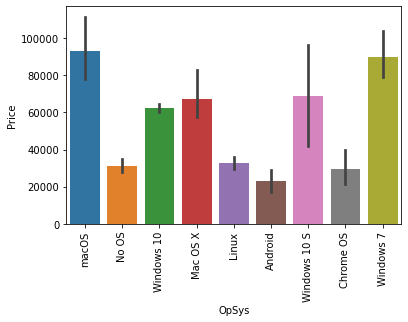

In [75]:
sns.barplot(df['OpSys'],df['Price'])
plt.xticks(rotation='vertical')

In [76]:
# Club (Windows 10,Windows 7,Windows 10 S)--> Windows
# Club (macOS ,Mac OS X)--> mac
# Club (No OS,Linux,Chrome OS, Android) --> others

def setcategory(text):
    
    if text=='Windows 10' or text == 'Windows 7' or text=='Windows 10 S' :
        return 'Windows'
    elif text =='macOS' or text=='Mac OS X':
        return 'Mac'
    else:
        return 'other'
    
df['OpSys']=df['OpSys'].apply(lambda x: setcategory(x))

C:\Users\Dell\AppData\Local\Temp/ipykernel_9376/1191760196.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OpSys']=df['OpSys'].apply(lambda x: setcategory(x))


In [77]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,y_res,x_res,touchscreen,...,IPS_Panel,Cpu_name,Cpu_speed,Memory_size,Memory_type,Memory_ext,Memory_ext_size,Memory_ext_type,gpu_2,Gpu_brand
0,Apple,Ultrabook,13.3,8,Mac,1.37,71378.6832,1600,2560,0,...,1,Intel Core i5,2.3,128,SSD,NaN,NaN,NaN,Iris,Intel
1,Apple,Ultrabook,13.3,8,Mac,1.34,47895.5232,900,1440,0,...,0,Intel Core i5,1.8,128,Flash Storage,NaN,NaN,NaN,HD,Intel
2,HP,Notebook,15.6,8,other,1.86,30636.0000,1080,1920,0,...,0,Intel Core i5,2.5,256,SSD,NaN,NaN,NaN,HD,Intel
3,Apple,Ultrabook,15.4,16,Mac,1.83,135195.3360,1800,2880,0,...,1,Intel Core i7,2.7,512,SSD,NaN,NaN,NaN,Radeon,AMD
4,Apple,Ultrabook,13.3,8,Mac,1.37,96095.8080,1600,2560,0,...,1,Intel Core i5,3.1,256,SSD,NaN,NaN,NaN,Iris,Intel


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

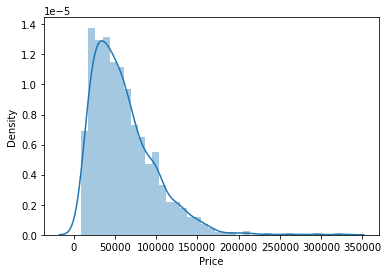

In [78]:
sns.distplot(df['Price'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

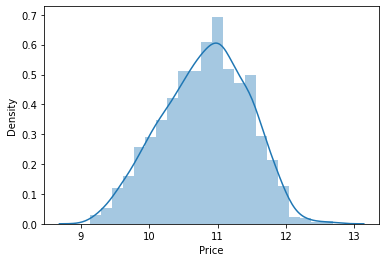

In [79]:
sns.distplot(np.log(df['Price']))

In [80]:
df['Memory_size'].value_counts()

256     508
1000    250
128     177
512     140
500     132
32       44
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: Memory_size, dtype: int64

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1302 non-null   object 
 1   TypeName         1302 non-null   object 
 2   Inches           1302 non-null   float64
 3   Ram              1302 non-null   int32  
 4   OpSys            1302 non-null   object 
 5   Weight           1302 non-null   float64
 6   Price            1302 non-null   float64
 7   y_res            1302 non-null   int32  
 8   x_res            1302 non-null   int32  
 9   touchscreen      1302 non-null   int64  
 10  Full_HD          1302 non-null   int64  
 11  IPS_Panel        1302 non-null   int64  
 12  Cpu_name         1302 non-null   object 
 13  Cpu_speed        1302 non-null   float64
 14  Memory_size      1302 non-null   int32  
 15  Memory_type      1302 non-null   object 
 16  Memory_ext       208 non-null    object 
 17  Memory_ext_siz

## Numerical data Feature Selection

In [82]:
df.corr()['Price']

Inches         0.067329
Ram            0.742905
Weight         0.209867
Price          1.000000
y_res          0.554591
x_res          0.557369
touchscreen    0.192917
Full_HD        0.198093
IPS_Panel      0.253320
Cpu_speed      0.430122
Memory_size   -0.123038
Name: Price, dtype: float64

<AxesSubplot:>

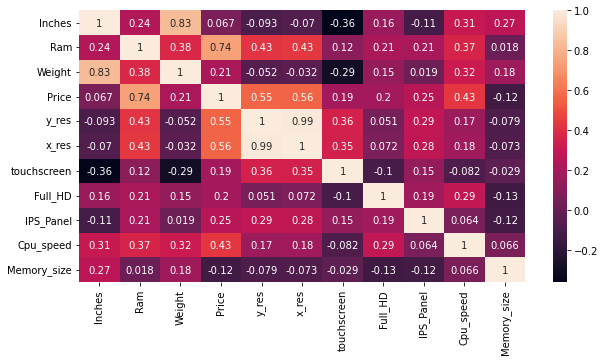

In [83]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot = True)

In [84]:
df.drop('Inches',axis=1,inplace = True)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [85]:
df['Ram'].value_counts()

8     619
4     374
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

<AxesSubplot:xlabel='Ram', ylabel='Price'>

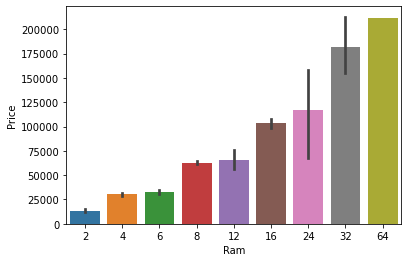

In [90]:
sns.barplot(x=df['Ram'],y=df['Price'])

In [102]:
df['Ram']=df['Ram'].replace([4,6],'4-6')
df['Ram']=df['Ram'].replace([8,12],'8-12')

C:\Users\Dell\AppData\Local\Temp/ipykernel_9376/2156627702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ram']=df['Ram'].replace([4,6],'4-6')
C:\Users\Dell\AppData\Local\Temp/ipykernel_9376/2156627702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ram']=df['Ram'].replace([8,12],'8-12')


In [103]:
df['Ram'].dtype

dtype('O')

In [104]:
df['Ram'].value_counts()

8-12    644
4-6     415
16      200
2        22
32       17
24        3
64        1
Name: Ram, dtype: int64

## Categorical Data Feature Selection

In [86]:
cat_features=[]
for i in df.columns:
    if df[i].dtype=='O':
        cat_features.append(i)

In [87]:
df['Memory_type'].dtype

dtype('O')

In [88]:
cat_features

['Company',
 'TypeName',
 'OpSys',
 'Cpu_name',
 'Memory_type',
 'Memory_ext',
 'Memory_ext_size',
 'Memory_ext_type',
 'gpu_2',
 'Gpu_brand']

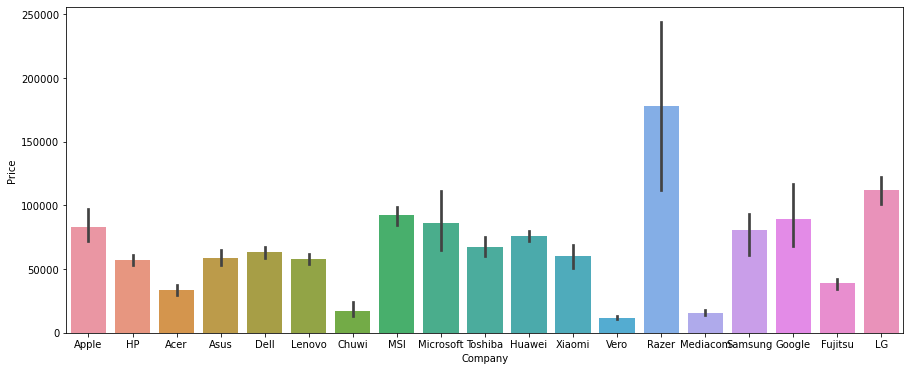

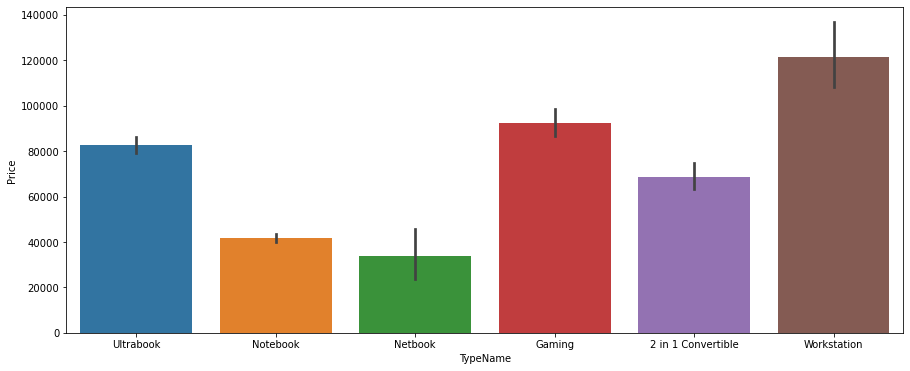

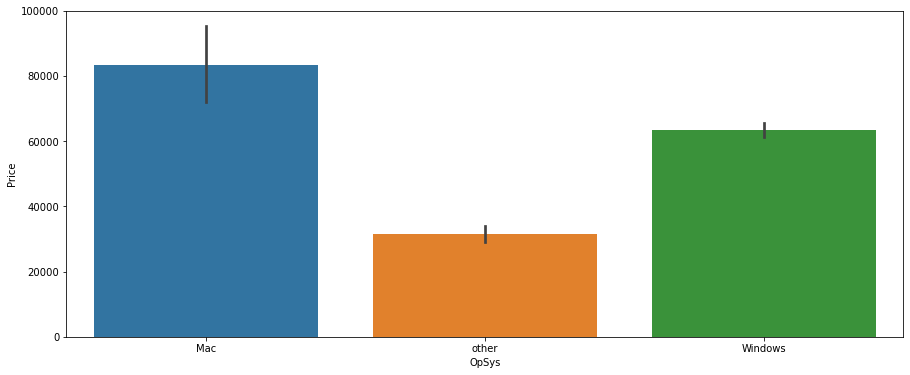

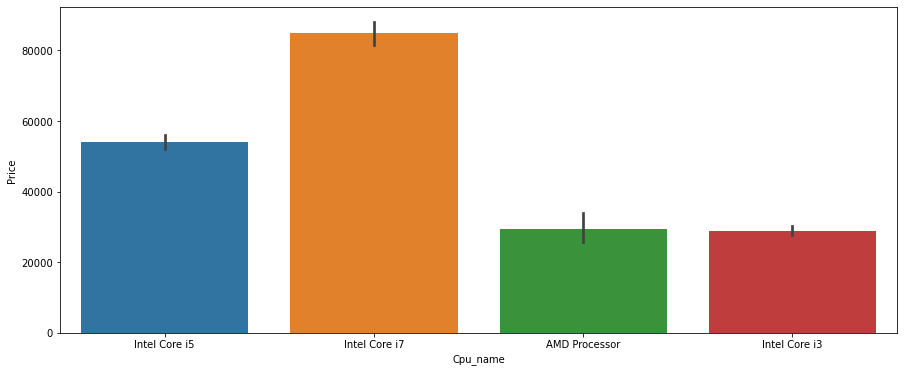

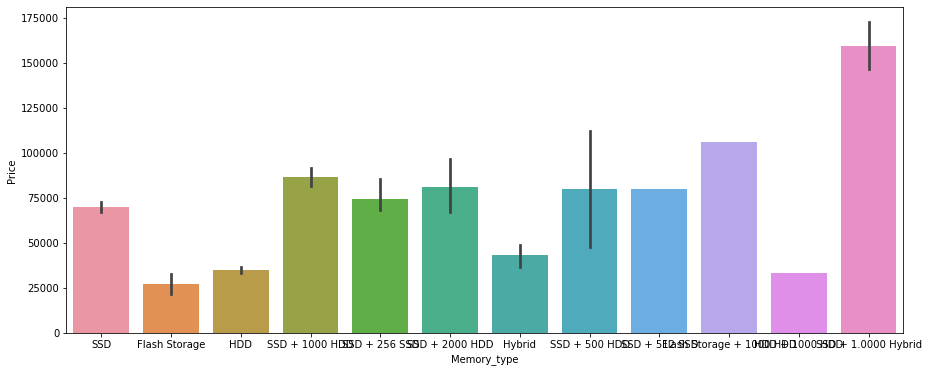

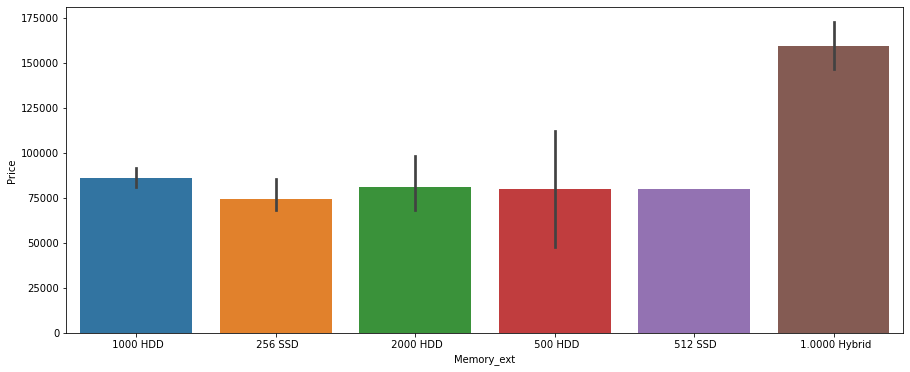

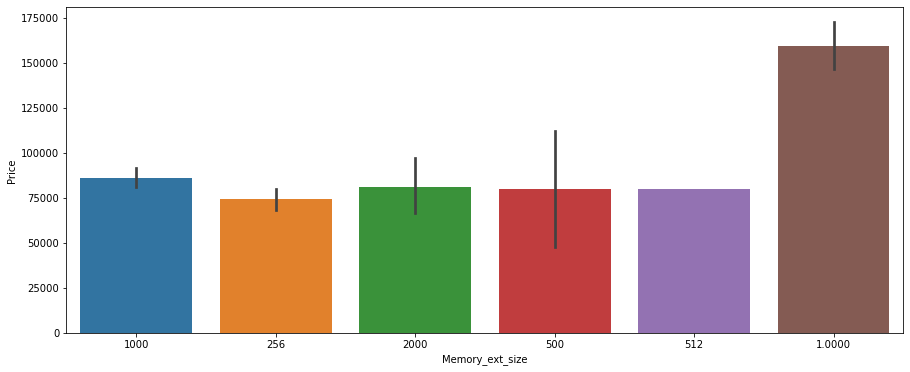

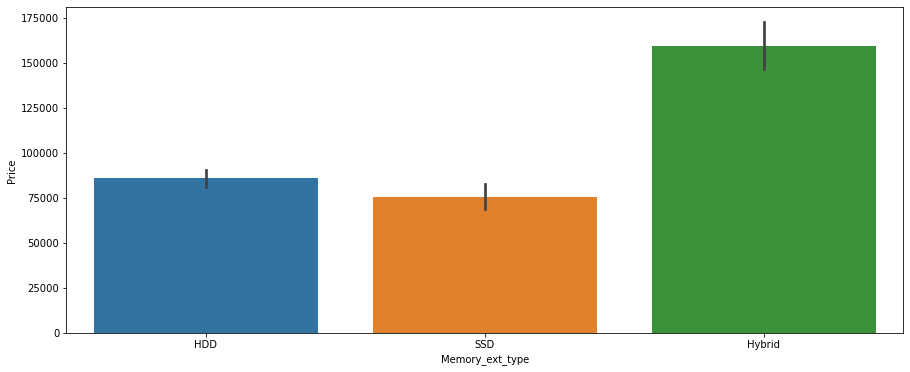

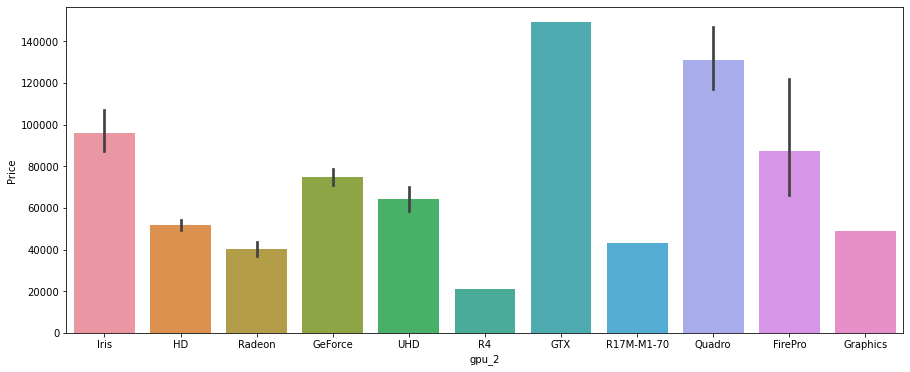

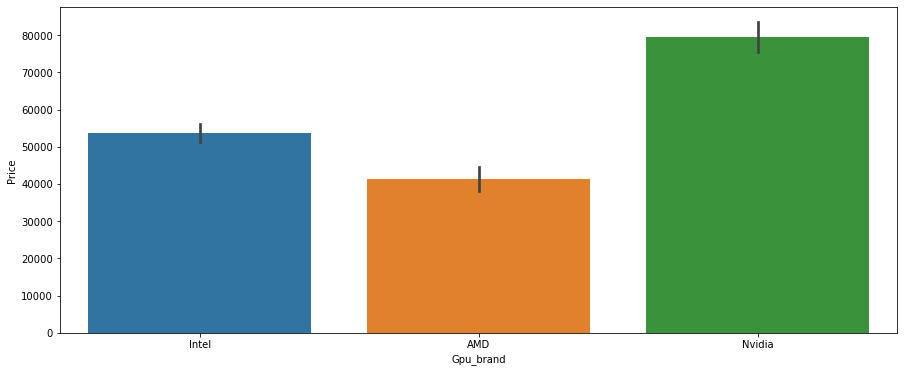

In [89]:
for i in cat_features:
    fig, ax = plt.subplots(1,1, figsize=(15, 6))
    sns.barplot(x=df[i],y=df['Price'])